In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy.stats import boxcox

sns.set_style("whitegrid")

## Data Import

In [2]:
test_scores = pd.read_csv('../data/test_scores_supplemented.csv', index_col='State')
naep_by_state = pd.read_csv('../data/naep_by_state.csv', index_col='State')

test_scores['spending_per_student'] = test_scores['spending_per_student']/1000
test_scores['teacher_salary'] = test_scores['teacher_salary']/1000

## EDA State Statistics

''

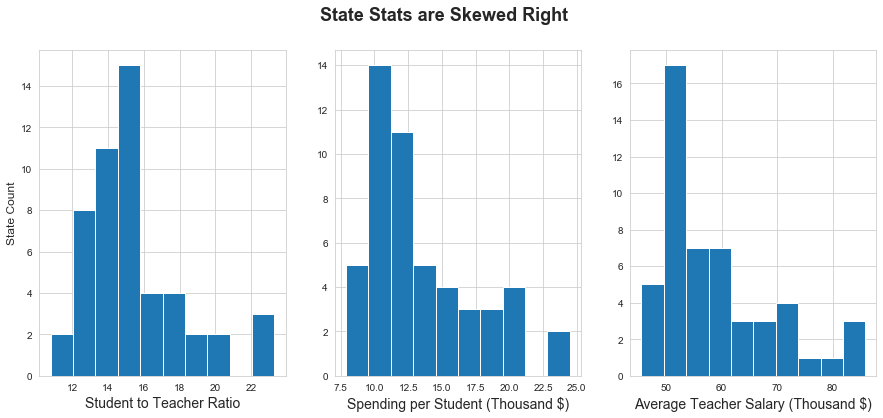

In [3]:
plt.figure(figsize = (15,6))

ax1 = plt.subplot(131)
plt.hist(test_scores['pupil_teacher_ratio'], bins=10)
plt.xlabel('Student to Teacher Ratio', fontsize=14)
plt.ylabel('State Count', fontsize=12)


ax1 = plt.subplot(132)
plt.hist(test_scores['spending_per_student'], bins=10)
plt.xlabel('Spending per Student (Thousand $)', fontsize=14)


ax3 = plt.subplot(133)
plt.hist(test_scores['teacher_salary'], bins=10)
plt.xlabel('Average Teacher Salary (Thousand $)', fontsize=14)

plt.suptitle('State Stats are Skewed Right', fontsize=18, weight="bold")
;

''

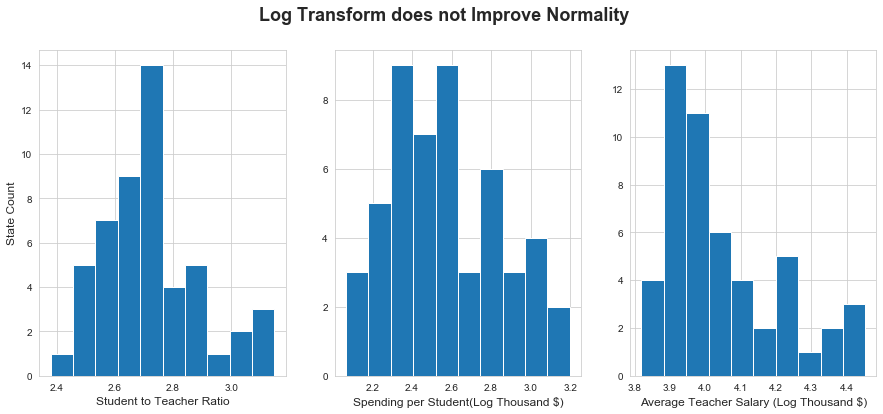

In [4]:
plt.figure(figsize = (15,6))

ax1 = plt.subplot(131)
plt.hist(np.log(test_scores['pupil_teacher_ratio']), bins=10)
plt.xlabel('Student to Teacher Ratio', fontsize=12)
plt.ylabel('State Count', fontsize=12)


ax1 = plt.subplot(132)
plt.hist(np.log(test_scores['spending_per_student']), bins=10)
plt.xlabel('Spending per Student(Log Thousand $)', fontsize=12)


ax3 = plt.subplot(133)
plt.hist(np.log(test_scores['teacher_salary']), bins=10)
plt.xlabel('Average Teacher Salary (Log Thousand $)', fontsize=12)

plt.suptitle('Log Transform does not Improve Normality', fontsize=18, weight="bold")
;

#### State Statistics and Test Averages

''

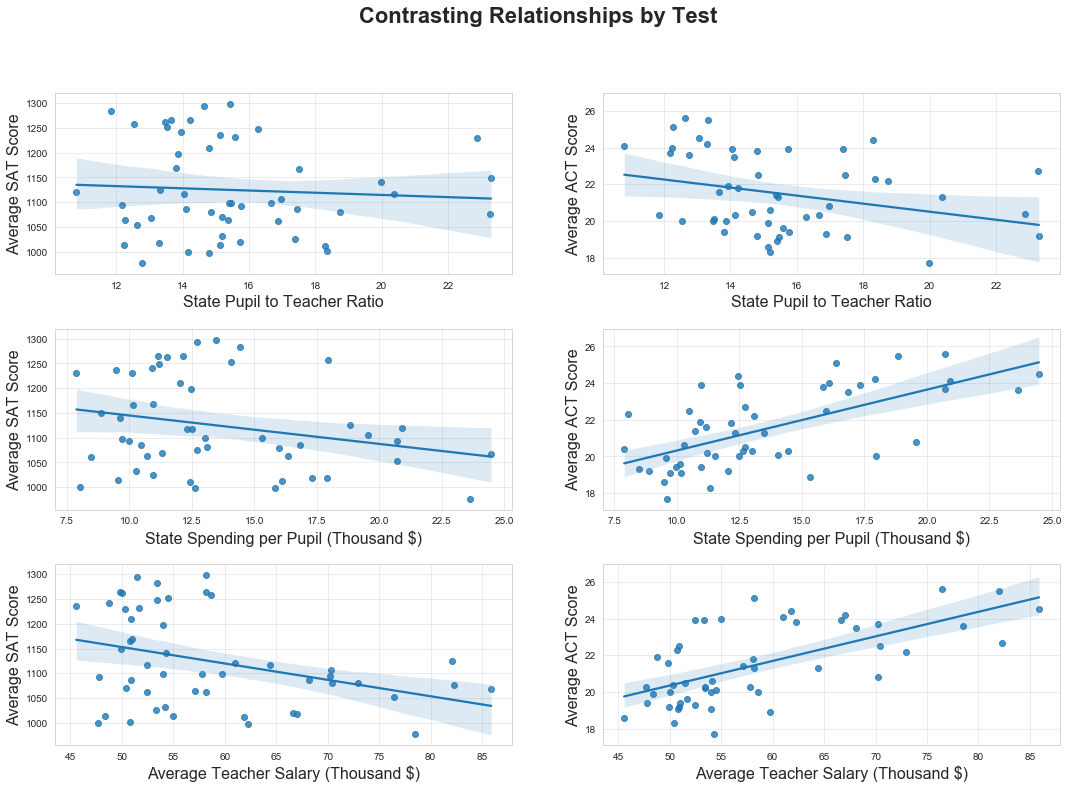

In [5]:
plt.figure(figsize = (18,12))

ax1 = plt.subplot(321)
sns.regplot(x='pupil_teacher_ratio', y='sat_2018', data=test_scores)

plt.xlabel("State Pupil to Teacher Ratio", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


ax2 = plt.subplot(322)
sns.regplot(x='pupil_teacher_ratio', y='act_2018', data=test_scores)

plt.xlabel("State Pupil to Teacher Ratio", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


ax3 = plt.subplot(323, sharey=ax1)
sns.regplot(x='spending_per_student', y='sat_2018', data=test_scores)

plt.xlabel("State Spending per Pupil (Thousand $)", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


ax4 = plt.subplot(324, sharey=ax2)
sns.regplot(x='spending_per_student', y='act_2018', data=test_scores)

plt.xlabel("State Spending per Pupil (Thousand $)", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


ax5 = plt.subplot(325, sharey=ax1)
sns.regplot(x='teacher_salary', y='sat_2018', data=test_scores)

plt.xlabel("Average Teacher Salary (Thousand $)", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


ax6 = plt.subplot(326, sharey=ax2)
sns.regplot(x='teacher_salary', y='act_2018', data=test_scores)

plt.xlabel("Average Teacher Salary (Thousand $)", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)


plt.suptitle("Contrasting Relationships by Test ", fontsize = 22, weight="bold")
plt.subplots_adjust(hspace = 0.3)
;

Above we note that these state statistics do not have a very strong relationship with test score state averages on their own. Importantly, we note the sign of the relationship flips between SAT and ACT for 2 of the 3 features. State spending per pupil appears slightly negatively related to SAT score but with extremely high variance. State spending per pupil appears strongly positively related to SAT score and with much more moderate variance. Average teacher salary appears moderately negatively related to SAT score but with extremely high variance at the low end. Average teacher salary appears moderately positively related to ACT score but with moderate variance throughout.

In [6]:
test_scores['sat_2018_part50'] = 0
test_scores.loc[test_scores['sat_2018_part'] >= 50, 'sat_2018_part50'] = 1
test_scores['act_2018_part50'] = 0
test_scores.loc[test_scores['act_2018_part'] >= 50, 'act_2018_part50'] = 1

''

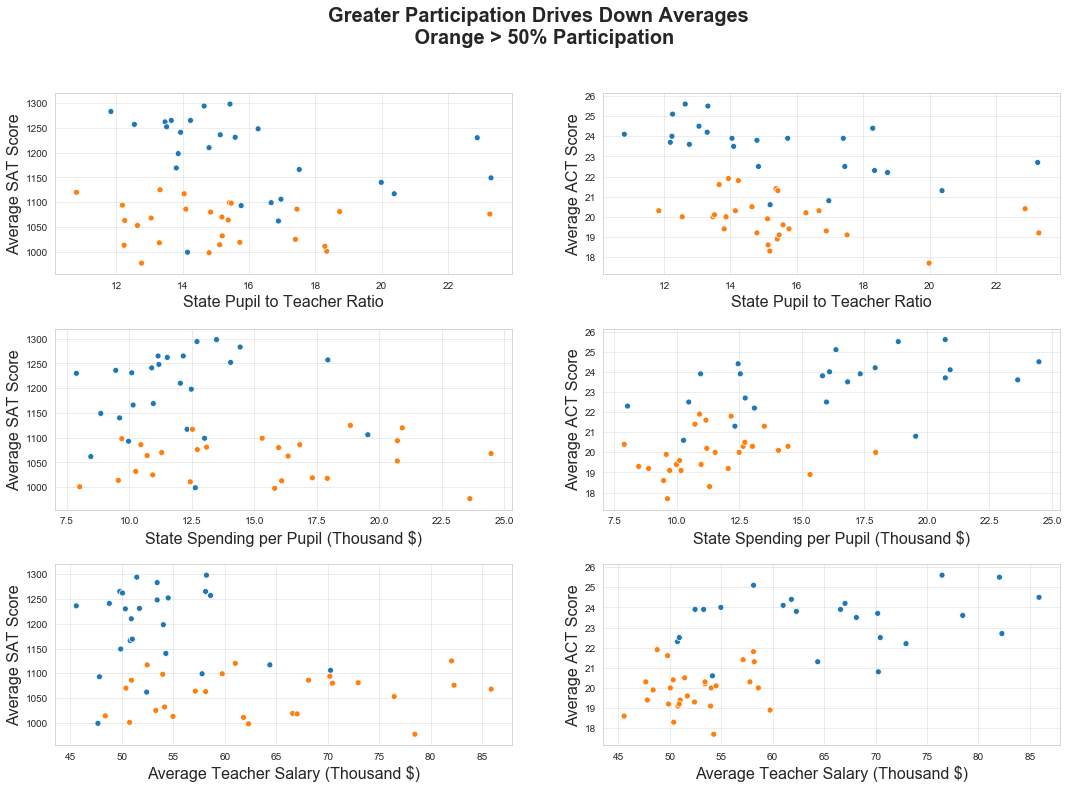

In [7]:
plt.figure(figsize = (18,12))

ax1 = plt.subplot(321)
sns.scatterplot(x='pupil_teacher_ratio', y='sat_2018', hue='sat_2018_part50', data=test_scores)

plt.xlabel("State Pupil to Teacher Ratio", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax1.get_legend().remove()


ax2 = plt.subplot(322)
sns.scatterplot(x='pupil_teacher_ratio', y='act_2018', hue='act_2018_part50', data=test_scores)

plt.xlabel("State Pupil to Teacher Ratio", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax2.get_legend().remove()


ax3 = plt.subplot(323, sharey=ax1)
sns.scatterplot(x='spending_per_student', y='sat_2018', hue='sat_2018_part50', data=test_scores)

plt.xlabel("State Spending per Pupil (Thousand $)", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax3.get_legend().remove()


ax4 = plt.subplot(324, sharey=ax2)
sns.scatterplot(x='spending_per_student', y='act_2018', hue='act_2018_part50', data=test_scores)

plt.xlabel("State Spending per Pupil (Thousand $)", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax4.get_legend().remove()


ax5 = plt.subplot(325, sharey=ax1)
sns.scatterplot(x='teacher_salary', y='sat_2018', hue='sat_2018_part50', data=test_scores)

plt.xlabel("Average Teacher Salary (Thousand $)", fontsize = 16)
plt.ylabel("Average SAT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax5.get_legend().remove()


ax6 = plt.subplot(326, sharey=ax2)
sns.scatterplot(x='teacher_salary', y='act_2018', hue='act_2018_part50', data=test_scores)

plt.xlabel("Average Teacher Salary (Thousand $)", fontsize = 16)
plt.ylabel("Average ACT Score", fontsize = 16)
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.15)
ax6.get_legend().remove()


plt.suptitle("Greater Participation Drives Down Averages \n Orange > 50% Participation", fontsize = 20, weight="bold")
plt.subplots_adjust(hspace = 0.3)
;

By color-coding for state participation rate, we find the diverging relationships identified in the previous plots were driven more by participation rates than the depicted value. High and low participation-rate states differ systematically in their scores which conflates the estimate of state education system statistics. Considering only the orange points, color-coded for greater than 50% participation on that test for the correspnonding state, we find much weaker relationships and reverse the presumed relationship with average SAT scores specifically.

## State Statistics Correlation

We observe significant correlation between our state features, suggesting any coefficients cannot be meaningfully interpreted in a multiple linear regression model.

In [8]:
# Correlations
test_scores[['sat_2018_part','pupil_teacher_ratio', 'spending_per_student', 'teacher_salary']].corr()

,sat_2018_part,pupil_teacher_ratio,spending_per_student,teacher_salary
sat_2018_part,1.000000,-0.084578,0.441229,0.518548
pupil_teacher_ratio,-0.084578,1.000000,-0.546951,-0.069724
spending_per_student,0.441229,-0.546951,1.000000,0.776679
teacher_salary,0.518548,-0.069724,0.776679,1.000000


We observe high correlation between several features, particularly spending features. This is likely because higher teacher salaries drive up total spending on public education. Similarly more students per teacher relieves financial strain and enables less spending per student. We will avoid avoid confidence in any assertions regarding these variables and will utilize robust methods rather than pure OLS when highly correlated features are present.

## Simple Regressions with State Statistics

Below we create several basic linear regression models utilizing one state statistic and then adding participation rate. Generally, state statistics have a statistically insignificant coefficient and extremely low explanatory power. When added to models incorporating state participation rates, we find marginal gains in explanatory power compared to the previous univariate models, however many coefficients remain insignificant. 

We find two critical patterns hold:<br>
1. After controlling for participation rates, coefficients dramatically reduce in magnitude or flip signs
2. These coefficients vary greatly between using SAT and ACT averages as our dependent / target variable.

### SAT

In [9]:
sat_coef=dict()
sat_p = dict()

#### Student-Teacher Ratio

In [10]:
X = test_scores[['pupil_teacher_ratio']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['str'] =lr_sat_2018.params
sat_p['str'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2208
Date:                Thu, 18 Jun 2020   Prob (F-statistic):              0.641
Time:                        00:11:37   Log-Likelihood:                -303.38
No. Observations:                  51   AIC:                             610.8
Df Residuals:                      49   BIC:                             614.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1159.0270    

In [11]:
X = test_scores[['pupil_teacher_ratio', 'sat_2018_part']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['str_part'] =lr_sat_2018.params
sat_p['str_part'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     69.26
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           7.11e-15
Time:                        00:11:37   Log-Likelihood:                -268.88
No. Observations:                  51   AIC:                             543.8
Df Residuals:                      48   BIC:                             549.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1295.7197    

#### Spending per Student

In [12]:
X = test_scores[['spending_per_student']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['sp'] =lr_sat_2018.params
sat_p['sp'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.219
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0790
Time:                        00:11:37   Log-Likelihood:                -301.88
No. Observations:                  51   AIC:                             607.8
Df Residuals:                      49   BIC:                             611.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1202.2514 

In [13]:
X = test_scores[['spending_per_student', 'sat_2018_part']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['sp_part'] =lr_sat_2018.params
sat_p['sp_part'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     69.47
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           6.74e-15
Time:                        00:11:37   Log-Likelihood:                -268.83
No. Observations:                  51   AIC:                             543.7
Df Residuals:                      48   BIC:                             549.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1181.3314 

#### Teacher Salary

In [14]:
X = test_scores[['teacher_salary']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['sal'] =lr_sat_2018.params
sat_p['sal'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.133
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0102
Time:                        00:11:37   Log-Likelihood:                -300.03
No. Observations:                  51   AIC:                             604.1
Df Residuals:                      49   BIC:                             607.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1318.3766     73.585     17.

In [15]:
X = test_scores[['teacher_salary', 'sat_2018_part']]
X = sm.add_constant(X)
y = test_scores['sat_2018']

lr_model = sm.OLS(y, X)
lr_sat_2018 = lr_model.fit()

sat_coef['sal_part'] = lr_sat_2018.params
sat_p['sal_part'] = lr_sat_2018.pvalues

print(lr_sat_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               sat_2018   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     65.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.72e-14
Time:                        00:11:37   Log-Likelihood:                -269.82
No. Observations:                  51   AIC:                             545.6
Df Residuals:                      48   BIC:                             551.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1166.6603     43.611     26.

In [16]:
sat_coef_df = round(pd.DataFrame.from_dict(sat_coef),2)
sat_p_df = round(pd.DataFrame.from_dict(sat_p),4)
sat_df = pd.merge(sat_coef_df, sat_p_df, left_index=True, right_index=True)
sat_df.columns = ['I','II','III','IV','V','VI',
                  'I(p)','II(p)','III(p)','IV(p)','V(p)','VI(p)']
sat_df = sat_df[sat_df.columns.sort_values()]
sat_df = sat_df.astype(str).replace('nan', ' ')

### ACT

In [17]:
act_coef=dict()
act_p = dict()

#### Student-Teacher Ratio

In [18]:
X = test_scores[['pupil_teacher_ratio']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['str'] =lr_act_2018.params
act_p['str'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.593
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0371
Time:                        00:11:37   Log-Likelihood:                -107.84
No. Observations:                  51   AIC:                             219.7
Df Residuals:                      49   BIC:                             223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.8863    

In [19]:
X = test_scores[['pupil_teacher_ratio', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['str_part'] =lr_act_2018.params
act_p['str_part'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     89.75
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           6.06e-17
Time:                        00:11:37   Log-Likelihood:                -70.451
No. Observations:                  51   AIC:                             146.9
Df Residuals:                      48   BIC:                             152.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  27.2672    

#### Spending per Student

In [20]:
X = test_scores[['spending_per_student']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['spend'] =lr_act_2018.params
act_p['spend'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     33.45
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.04e-07
Time:                        00:11:37   Log-Likelihood:                -96.858
No. Observations:                  51   AIC:                             197.7
Df Residuals:                      49   BIC:                             201.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.0078 

In [21]:
X = test_scores[['spending_per_student', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['spend_part'] =lr_act_2018.params
act_p['spend_part'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     90.71
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.95e-17
Time:                        00:11:37   Log-Likelihood:                -70.236
No. Observations:                  51   AIC:                             146.5
Df Residuals:                      48   BIC:                             152.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.4390 

#### Teacher Salary

In [22]:
X = test_scores[['teacher_salary']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['sal'] =lr_act_2018.params
act_p['sal'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.90
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.39e-07
Time:                        00:11:37   Log-Likelihood:                -96.719
No. Observations:                  51   AIC:                             197.4
Df Residuals:                      49   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.6583      1.366      9.

In [23]:
X = test_scores[['teacher_salary', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

act_coef['sal_part'] =lr_act_2018.params
act_p['sal_part'] = lr_act_2018.pvalues

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     77.98
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           8.32e-16
Time:                        00:11:37   Log-Likelihood:                -73.235
No. Observations:                  51   AIC:                             152.5
Df Residuals:                      48   BIC:                             158.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.9978      1.310     16.

In [24]:
act_coef_df = round(pd.DataFrame.from_dict(act_coef),2)
act_p_df = round(pd.DataFrame.from_dict(act_p),4)
act_df = pd.merge(act_coef_df, act_p_df, left_index=True, right_index=True)
act_df.columns = ['I','II','III','IV','V','VI',
                  'I(p)','II(p)','III(p)','IV(p)','V(p)','VI(p)']
act_df = act_df[act_df.columns.sort_values()]
act_df = act_df.astype(str).replace('nan', ' ')

## Summary

In [25]:
sat_df.reindex(index = ['const','sat_2018_part','pupil_teacher_ratio','spending_per_student','teacher_salary'])

,I,I(p),II,II(p),III,III(p),IV,IV(p),V,V(p),VI,VI(p)
const,1159.03,0.0,1295.72,0.0,1202.25,0.0,1181.33,0.0,1318.38,0.0,1166.66,0.0
sat_2018_part,,,-2.13,0.0,,,-2.27,0.0,,,-2.25,0.0
pupil_teacher_ratio,-2.22,0.6405,-4.64,0.0629,,,,,,,,
spending_per_student,,,,,-5.73,0.079,3.64,0.059,,,,
teacher_salary,,,,,,,,,-3.31,0.0102,1.07,0.1913


In [26]:
act_df.reindex(index = ['const','act_2018_part','pupil_teacher_ratio','spending_per_student','teacher_salary'])

,I,I(p),II,II(p),III,III(p),IV,IV(p),V,V(p),VI,VI(p)
const,24.89,0.0,27.27,0.0,17.01,0.0,22.44,0.0,13.66,0.0,22.0,0.0
act_2018_part,,,-0.05,0.0,,,-0.05,0.0,,,-0.05,0.0
pupil_teacher_ratio,-0.22,0.0371,-0.16,0.0018,,,,,,,,
spending_per_student,,,,,0.33,0.0,0.14,0.0015,,,,
teacher_salary,,,,,,,,,0.13,0.0,0.04,0.033


In all of our models, the participation rate variable dominated all others in impact. The explanatory models of all models without participation rates were low, although they were much more powerful in explaining ACT than SAT averages. Above we noted how participation rates appeared to distort the appearance of relationships between state test averages and underlying system statistics. Here we find that the coefficients for these variables reduces drastically once we control for participation rate. Furthermore, we find the signs of these education indicators flips based on whether SAT or ACT scores serve as the target variable.

## Full Models

In [42]:
X = test_scores[['act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()
print(lr_act_2018.summary())

base_act_mae = abs(y - y.mean()).mean()
slr_act_mae = abs(lr_act_2018.resid).mean()
print('ACT Mean Absolute Error Baseline: {}'.format(round(base_act_mae,2)))
print('ACT Mean Absolute Error Participation SLR: {}'.format(round(slr_act_mae,2)))

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.51e-16
Time:                        00:39:43   Log-Likelihood:                -75.676
No. Observations:                  51   AIC:                             155.4
Df Residuals:                      49   BIC:                             159.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.7955      0.317     78.104

In [43]:
X = test_scores[['pupil_teacher_ratio', 'spending_per_student', 'teacher_salary', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

print(lr_act_2018.summary())

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     49.45
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.32e-16
Time:                        00:39:44   Log-Likelihood:                -67.601
No. Observations:                  51   AIC:                             145.2
Df Residuals:                      46   BIC:                             154.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.6486 

We drop spending_per_student from inclusion due to its extremely high p value and the collinearity problem created by its -0.546951 and 0.776679 correlation with pupil_teacher_ratio and teacher_salary respectively.

In [44]:
X = test_scores[['pupil_teacher_ratio', 'teacher_salary', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']

lr_model = sm.OLS(y, X)
lr_act_2018 = lr_model.fit()

print(lr_act_2018.summary())

base_act_mae = abs(y - y.mean()).mean()
slr_act_mae = abs(lr_act_2018.resid).mean()
print('ACT Mean Absolute Error Baseline: {}'.format(round(base_act_mae,2)))
print('ACT Mean Absolute Error Participation SLR: {}'.format(round(slr_act_mae,2)))

                            OLS Regression Results                            
Dep. Variable:               act_2018   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     67.30
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.88e-17
Time:                        00:39:44   Log-Likelihood:                -67.620
No. Observations:                  51   AIC:                             143.2
Df Residuals:                      47   BIC:                             151.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.5195    

After dropping spending-per-student due to its extremely high p-value, we find a predictive model with all significant coefficients at the 95\% confidence level. The above model suggests that after controlling for state participation rates and assuming all else is equal, a \$10,000 increase in teacher salary is associated with a 0.4 point increase in a state's average ACT score while an increase in average class size of 2.5 students is associated with a 0.4 point decrease. 

A baseline model of predicting the national average poduces a mean absolute error of 1.83 points. Our single variable model utilizing only participation rates produced a mean absolute error of 0.89 points. This model reduces the mean absolute error to 0.71 points, meaning the additional information of student-teacher ratio and teacher salary reduced our prediction error by 20\% and our explanatory power as measured by adjusted R-squared increased by 6 percentage points.

#### 2017 Comparison

In [46]:
X = test_scores[['act_2017_part']]
X = sm.add_constant(X)
y = test_scores['act_2017']

lr_model = sm.OLS(y, X)
lr_act_2017 = lr_model.fit()
print(lr_act_2017.summary())

base_act_mae = abs(y - y.mean()).mean()
slr_act_mae = abs(lr_act_2017.resid).mean()
print('ACT Mean Absolute Error Baseline: {}'.format(round(base_act_mae,2)))
print('ACT Mean Absolute Error Participation SLR: {}'.format(round(slr_act_mae,2)))

                            OLS Regression Results                            
Dep. Variable:               act_2017   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           8.54e-16
Time:                        00:49:53   Log-Likelihood:                -73.737
No. Observations:                  51   AIC:                             151.5
Df Residuals:                      49   BIC:                             155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.0402      0.335     74.794

In [47]:
X = test_scores[['pupil_teacher_ratio', 'teacher_salary', 'act_2017_part']]
X = sm.add_constant(X)
y = test_scores['act_2017']

lr_model = sm.OLS(y, X)
lr_act_2017 = lr_model.fit()

print(lr_act_2017.summary())

base_act_mae = abs(y - y.mean()).mean()
slr_act_mae = abs(lr_act_2017.resid).mean()
print('ACT Mean Absolute Error Baseline: {}'.format(round(base_act_mae,2)))
print('ACT Mean Absolute Error Participation SLR: {}'.format(round(slr_act_mae,2)))

                            OLS Regression Results                            
Dep. Variable:               act_2017   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     69.92
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.36e-17
Time:                        00:49:54   Log-Likelihood:                -64.436
No. Observations:                  51   AIC:                             136.9
Df Residuals:                      47   BIC:                             144.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.5499    

Repeating the above analysis with 2017 data, we find even more dramatic results. All coefficients remain statistically significant at the 95\% confidence level. The median absolute error decreases to 0.68 which is 5% lower than with the 2018 data.

#### Consistency Check

In [65]:
X = test_scores[['pupil_teacher_ratio', 'teacher_salary', 'act_2018_part']]
X = sm.add_constant(X)
y = test_scores['act_2018']
y_hat= lr_act_2017.predict(X)
print('ACT Mean Absolute Error MLR Prediction: {}'.format(round(abs(y-y_hat).mean(),2)))

ACT Mean Absolute Error MLR Prediction: 0.75


Utilizing 2017 data to train our linear model, we can predict 2018 averages with a mean absolute error of 0.75, an increase of only 0.04 compared to our model when trained directly on 2018 data. This demonstrates the stability of state scores and consistency in our coefficient estimates.